# mtflib User Guide

Welcome to the mtflib user guide! This notebook will walk you through the fundamental usage of the `mtflib` for creating and manipulating Multivariate Taylor Functions (MTFs). It assumes you have a basic understanding of Python and Jupyter notebooks.

## 1. Initialization of Global Settings for MTFs

Before working with MTFs, we need to initialize global settings such as the maximum order and dimension for the Taylor series expansions, as well as the global error tolerance.

**Important Note**: The global settings for MTF should be initialized only once at the beginning of your session. Modifying these settings after calculations have been performed can lead to unexpected behavior due to inconsistencies in the order and number of variables. If you need to change `max_order` or `max_dimension`, you will need to restart the Jupyter kernel (or your Python session) to ensure a clean initialization.

In [1]:
from mtflib import *
import numpy as np

# Check if MTF globals are already initialized
if not MultivariateTaylorFunction.get_mtf_initialized_status():
    MultivariateTaylorFunction.initialize_mtf(max_order=8, max_dimension=3)
    MultivariateTaylorFunction.set_etol(1e-16)
else:
    print("MTF globals are already initialized. To change max_order or max_dimension, please restart the session.")

Initializing MTF globals with: _MAX_ORDER=8, _MAX_DIMENSION=3
Loading/Precomputing Taylor coefficients up to order 8
Global precomputed coefficients loading/generation complete.
Size of precomputed_coefficients dictionary in memory: 464 bytes, 0.45 KB, 0.00 MB
MTF globals initialized: _MAX_ORDER=8, _MAX_DIMENSION=3, _INITIALIZED=True
Max coefficient count (order=8, nvars=3): 165
Precomputed coefficients loaded and ready for use.


## 2. Defining Variables for MTFs

Next, we define the symbolic variables that will be used in our Taylor functions.

**`Var(var_id_int)` Function**: The `Var(var_id_int)` function is used to initialize a symbolic variable for Taylor expansion. It creates a first-order Taylor polynomial representing a single variable. The `var_id_int` argument specifies the dimension of the variable, represented as an integer from `1` to `max_dimension` (inclusive). The order of this integer also corresponds to the order of the variable in the coefficient exponent tuple (e.g., for `max_dimension=3`, the first element of the exponent tuple is the power of the variable with ID 1, the second element is the power of the variable with ID 2, and so on).

In [2]:
# Define variables for a 3-dimensional space (since max_dimension is 3)
x = Var(1)
y = Var(2)
z = Var(3)

print(f"Variable x:\n{x}")
print(f"Variable y:\n{y}")
print(f"Variable z:\n{z}")
print("--Explanation of Taylor expansion table view columns--")
print("I: Index of the term in the Taylor series expansion (for internal tracking)")
print("Coefficient: The numerical value of the Taylor expansion coefficient")
print("Order: The total order (sum of exponents) of the Taylor term")
print("Exponents: The powers of each variable in the term, corresponding to (power of x, power of y, power of z)")

Variable x:
         Coefficient  Order  Exponents
0 1.000000000000e+00      1  (1, 0, 0)

Variable y:
         Coefficient  Order  Exponents
0 1.000000000000e+00      1  (0, 1, 0)

Variable z:
         Coefficient  Order  Exponents
0 1.000000000000e+00      1  (0, 0, 1)

--Explanation of Taylor expansion table view columns--
I: Index of the term in the Taylor series expansion (for internal tracking)
Coefficient: The numerical value of the Taylor expansion coefficient
Order: The total order (sum of exponents) of the Taylor term
Exponents: The powers of each variable in the term, corresponding to (power of x, power of y, power of z)


## 3. Working with Functions of One Variable

Let's start by exploring the `sin_taylor` function, which takes one variable as input. We will demonstrate how to view its Taylor expansion, calculate its derivative and indefinite integral, compare it with the `cos_taylor` function (its analytical derivative), and perform definite integration.

In [3]:
# Taylor expansion of sin(x)
sin_x = sin_taylor(x)
print(f"Taylor expansion of sin(x):\n{sin_x}")

# Calculate the first derivative of sin(x) with respect to x (variable index 1)
derivative_sin_x = derivative(sin_x, 1)
print(f"Derivative of sin(x) with respect to x:\n{derivative_sin_x}")

# Compare with the Taylor expansion of cos(x)
cos_x = cos_taylor(x)
print(f"Taylor expansion of cos(x):\n{cos_x}")

Taylor expansion of sin(x):
          Coefficient  Order  Exponents
0  1.000000000000e+00      1  (1, 0, 0)
1 -1.666666666667e-01      3  (3, 0, 0)
2  8.333333333333e-03      5  (5, 0, 0)
3 -1.984126984127e-04      7  (7, 0, 0)

Derivative of sin(x) with respect to x:
          Coefficient  Order  Exponents
0  1.000000000000e+00      0  (0, 0, 0)
1 -5.000000000000e-01      2  (2, 0, 0)
2  4.166666666667e-02      4  (4, 0, 0)
3 -1.388888888889e-03      6  (6, 0, 0)

Taylor expansion of cos(x):
          Coefficient  Order  Exponents
0  1.000000000000e+00      0  (0, 0, 0)
1 -5.000000000000e-01      2  (2, 0, 0)
2  4.166666666667e-02      4  (4, 0, 0)
3 -1.388888888889e-03      6  (6, 0, 0)
4  2.480158730159e-05      8  (8, 0, 0)



In [4]:
# Calculate the indefinite integral of sin(x) with respect to x (variable index 1)
indef_integral_sin_x = integrate(sin_x, 1)
print(f"Indefinite integral of sin(x) with respect to x:\n{indef_integral_sin_x}")

# Calculate the definite integral of sin(x) with respect to x from 0 to π/2
def_integral_sin_x = integrate(sin_x, 1, 0, np.pi/2)
print(f"Definite integral of sin(x) from 0 to π/2:\n{def_integral_sin_x}")

Indefinite integral of sin(x) with respect to x:
          Coefficient  Order  Exponents
0  5.000000000000e-01      2  (2, 0, 0)
1 -4.166666666667e-02      4  (4, 0, 0)
2  1.388888888889e-03      6  (6, 0, 0)
3 -2.480158730159e-05      8  (8, 0, 0)

Definite integral of sin(x) from 0 to π/2:
                             Coefficient  Order  Exponents
0 9.999752627236e-01+0.000000000000e+00j      0  (0, 0, 0)



## 4. Working with Functions of Multiple Variables

Now, let's explore functions that depend on multiple variables. We will look at examples of creating such functions, evaluate them at a specific point using the `eval` method, and perform differentiation and integration with respect to different variables.

In [5]:
# Define a Taylor function with three variables: exp(x + y**4 + z**6)
exp_xyz = exp_taylor(x + y**4 + z**6)
print(f"Taylor expansion of exp(x + y**4 + z**6):\n{exp_xyz}")

# Calculate the indefinite integral with respect to y (variable index 2)
indef_integral_exp_xyz = integrate(exp_xyz, 2)
print(f"Indefinite integral of exp(x + y**4 + z**6) with respect to y:\n{indef_integral_exp_xyz}")

# Calculate the definite integral with respect to y (variable index 2) from 0 to 1
def_integral_exp_xyz = integrate(exp_xyz, 2, 0, 1)
print(f"Definite integral of exp(x + y**4 + z**6) with respect to y from 0 to 1:\n{def_integral_exp_xyz}")

# Calculate the first derivative with respect to z (variable index 3)
derivative_exp_xyz = derivative(exp_xyz, 3)
print(f"Derivative of exp(x + y**4 + z**6) with respect to z:\n{derivative_exp_xyz}")

# Evaluate the function at the point [x=1, y=0, z=0]. The `eval` method takes a NumPy array representing the point.
eval_point = np.array([1, 0, 0])
eval_result = exp_xyz.eval(eval_point)
print(f"Evaluation of exp(x + y**4 + z**6) at [1, 0, 0]: {eval_result}")

Taylor expansion of exp(x + y**4 + z**6):
          Coefficient  Order  Exponents
0  1.000000000000e+00      0  (0, 0, 0)
1  1.000000000000e+00      1  (1, 0, 0)
2  5.000000000000e-01      2  (2, 0, 0)
3  1.666666666667e-01      3  (3, 0, 0)
4  4.166666666667e-02      4  (4, 0, 0)
5  1.000000000000e+00      4  (0, 4, 0)
6  8.333333333333e-03      5  (5, 0, 0)
7  1.000000000000e+00      5  (1, 4, 0)
8  1.388888888889e-03      6  (6, 0, 0)
9  5.000000000000e-01      6  (2, 4, 0)
10 1.000000000000e+00      6  (0, 0, 6)
11 1.984126984127e-04      7  (7, 0, 0)
12 1.666666666667e-01      7  (3, 4, 0)
13 1.000000000000e+00      7  (1, 0, 6)
14 2.480158730159e-05      8  (8, 0, 0)
15 4.166666666667e-02      8  (4, 4, 0)
16 5.000000000000e-01      8  (2, 0, 6)
17 5.000000000000e-01      8  (0, 8, 0)

Indefinite integral of exp(x + y**4 + z**6) with respect to y:
          Coefficient  Order  Exponents
0  1.000000000000e+00      1  (0, 1, 0)
1  1.000000000000e+00      2  (1, 1, 0)
2  5.000000000

## 5. Substitution and Composition of MTFs

This section demonstrates how to substitute variables within an MTF with constant values or other MTFs, and how to compose MTFs using the `compose` operation.

### 5.1 Substitution with a Constant

The `substitute_variable(var_index, constant_value)` method allows you to replace a specific variable in an MTF with a constant value. The `var_index` argument is the 1-based index of the variable to substitute, and `constant_value` is the numerical value to replace it with.

In [6]:
# Define a simple MTF: f(x, y, z) = x + y + z**4
fxyz = x + y + z**4
print(f"Original MTF: f(x, y, z) =\n{fxyz}")

# Substitute x (variable index 1) with the constant 0.1
gxyz = fxyz.substitute_variable(1, 0.1)
print(f"After substituting x with 0.1: g(y, z) =\n{gxyz}")

Original MTF: f(x, y, z) =
         Coefficient  Order  Exponents
0 1.000000000000e+00      1  (1, 0, 0)
1 1.000000000000e+00      1  (0, 1, 0)
2 1.000000000000e+00      4  (0, 0, 4)

After substituting x with 0.1: g(y, z) =
                             Coefficient  Order  Exponents
0 1.000000000000e-01+0.000000000000e+00j      0  (0, 0, 0)
1 1.000000000000e+00+0.000000000000e+00j      1  (0, 1, 0)
2 1.000000000000e+00+0.000000000000e+00j      4  (0, 0, 4)



### 5.2 Composition with Other MTFs

The `mtf_instance.compose(substitution_dict)` method allows you to substitute variables in an MTF with other MTFs. The `substitution_dict` is a Python dictionary where the keys are the 1-based indices of the variables to be substituted in `mtf_instance`, and the values are the MTFs that will replace those variables.

In [7]:
# Define the outer MTF: f(x, y) = x**2 + y**3 (in a space of at least 2 dimensions)
fxy = x**2 + y**3
print(f'Outer MTF before substitution: f(x, y) =\n{fxy}')

# Define the substituting MTFs:
# Substitute x (index 1) with g(y) = 1 + y
g_y = 1 + y
# Substitute y (index 2) with h(y, z) = 1 + y * z
h_yz = 1 + y * z

# Create the substitution dictionary
substitution_dict = {
    1: g_y,  # Substitute x with g(y)
    2: h_yz    # Substitute y with h(y, z)
}

# Perform the composition using the new compose method
composed_f = fxy.compose(substitution_dict)
print(f'Outer MTF after substitution: f(g(y), h(y, z)) =\n{composed_f}')

Outer MTF before substitution: f(x, y) =
         Coefficient  Order  Exponents
0 1.000000000000e+00      2  (2, 0, 0)
1 1.000000000000e+00      3  (0, 3, 0)

Outer MTF after substitution: f(g(y), h(y, z)) =
         Coefficient  Order  Exponents
0 2.000000000000e+00      0  (0, 0, 0)
1 2.000000000000e+00      1  (0, 1, 0)
2 1.000000000000e+00      2  (0, 2, 0)
3 3.000000000000e+00      2  (0, 1, 1)
4 3.000000000000e+00      4  (0, 2, 2)
5 1.000000000000e+00      6  (0, 3, 3)



## 6. Further Operations with MTFs

This section demonstrates some common arithmetic and comparison operations that can be performed with MTF objects, as well as how to access their coefficients.

### 6.1 Arithmetic Operations

In [8]:
# Define some MTFs to work with
sin_x = sin_taylor(x)
cos_x = cos_taylor(x)

# Addition
sum_tf = sin_x + cos_x
print(f"sin(x) + cos(x) =\n{sum_tf}")

# Subtraction
diff_tf = sin_x - cos_x
print(f"sin(x) - cos(x) =\n{diff_tf}")

# Multiplication by a scalar
scaled_sin_x = 2 * sin_x
print(f"2 * sin(x) =\n{scaled_sin_x}")

# Multiplication of two MTFs
product_tf = x * sin_x
print(f"x * sin(x) =\n{product_tf}")

# Power of an MTF
squared_x = x**2
print(f"x^2 =\n{squared_x}")

sin(x) + cos(x) =
          Coefficient  Order  Exponents
0  1.000000000000e+00      0  (0, 0, 0)
1  1.000000000000e+00      1  (1, 0, 0)
2 -5.000000000000e-01      2  (2, 0, 0)
3 -1.666666666667e-01      3  (3, 0, 0)
4  4.166666666667e-02      4  (4, 0, 0)
5  8.333333333333e-03      5  (5, 0, 0)
6 -1.388888888889e-03      6  (6, 0, 0)
7 -1.984126984127e-04      7  (7, 0, 0)
8  2.480158730159e-05      8  (8, 0, 0)

sin(x) - cos(x) =
          Coefficient  Order  Exponents
0 -1.000000000000e+00      0  (0, 0, 0)
1  1.000000000000e+00      1  (1, 0, 0)
2  5.000000000000e-01      2  (2, 0, 0)
3 -1.666666666667e-01      3  (3, 0, 0)
4 -4.166666666667e-02      4  (4, 0, 0)
5  8.333333333333e-03      5  (5, 0, 0)
6  1.388888888889e-03      6  (6, 0, 0)
7 -1.984126984127e-04      7  (7, 0, 0)
8 -2.480158730159e-05      8  (8, 0, 0)

2 * sin(x) =
          Coefficient  Order  Exponents
0  2.000000000000e+00      1  (1, 0, 0)
1 -3.333333333333e-01      3  (3, 0, 0)
2  1.666666666667e-02      5 

### 6.2 Comparison

In [9]:
# Comparing MTFs for equality
sin_x_again = sin_taylor(x)
are_equal = (sin_x == sin_x_again)
print(f"Is sin(x) == sin(x) again? {are_equal}")

cos_x_shifted = cos_taylor(x + 0.1)
are_unequal = (sin_taylor(x) == cos_x_shifted)
print(f"Is sin(x) == cos(x + 0.1)? {are_unequal}")

Is sin(x) == sin(x) again? True
Is sin(x) == cos(x + 0.1)? False


### 6.3 Accessing Coefficients

In [10]:
# Accessing the coefficients of an MTF
sin_x_for_coeffs = sin_taylor(x)
coefficients_sin_x = {tuple(exp): coeff for exp, coeff in zip(sin_x_for_coeffs.exponents, sin_x_for_coeffs.coeffs)}
print(f"Coefficients of sin(x):\n{coefficients_sin_x}")
print("Iterating through coefficients:")
for exponents, coefficient in coefficients_sin_x.items():
    exponents = tuple(int(x) for x in exponents) # convert from np.int64 to int
    print(f"Exponent tuple: {exponents}, Coefficient: {coefficient}")

Coefficients of sin(x):
{(np.int32(1), np.int32(0), np.int32(0)): np.float64(1.0), (np.int32(3), np.int32(0), np.int32(0)): np.float64(-0.16666666666666666), (np.int32(5), np.int32(0), np.int32(0)): np.float64(0.008333333333333333), (np.int32(7), np.int32(0), np.int32(0)): np.float64(-0.0001984126984126984)}
Iterating through coefficients:
Exponent tuple: (1, 0, 0), Coefficient: 1.0
Exponent tuple: (3, 0, 0), Coefficient: -0.16666666666666666
Exponent tuple: (5, 0, 0), Coefficient: 0.008333333333333333
Exponent tuple: (7, 0, 0), Coefficient: -0.0001984126984126984


### 6.4 Creating Constant and Zero MTFs

In [11]:
# Creating a constant MTF
# We will use "MTF" which isalias for MultvariateTaylorFunction class
constant_tf = MTF.from_constant(5) 
print(f"Constant MTF (value 5):\n{constant_tf}")

# Creating a zero MTF
zero_tf = 0 * x
print(f"Zero MTF:\n{zero_tf}")

Constant MTF (value 5):
         Coefficient  Order  Exponents
0 5.000000000000e+00      0  (0, 0, 0)

Zero MTF:
         Coefficient  Order  Exponents
0 0.000000000000e+00      1  (1, 0, 0)



## 7. Other Elementary Functions and Taylor Expansion Examples

`mtflib` provides Taylor expansions for various other elementary functions. Here are a few examples. Note that these functions also return `MultivariateTaylorFunction` objects.

In [12]:
# Taylor expansion of exp(x)
exp_x_tf = exp_taylor(x)
print(f"\nTaylor expansion of exp(x):\n{exp_x_tf}")

# Taylor expansion of gaussian(x) (exp(-x^2))
gaussian_x_tf = gaussian_taylor(x)
print(f"\nTaylor expansion of gaussian(x):\n{gaussian_x_tf}")

# Taylor expansion of sqrt(1+x)
sqrt_x_tf = sqrt_taylor(1+x)
print(f"\nTaylor expansion of sqrt(1+x):\n{sqrt_x_tf}")

# Taylor expansion of log(1+y)
log_y_tf = log_taylor(1+y)
print(f"\nTaylor expansion of log(1+y):\n{log_y_tf}")

# Taylor expansion of arctan(x + 2y + 0.5z)
arctan_x_tf = arctan_taylor(x+2*y+.5*z)
print(f"\nTaylor expansion of arctan(x + 2y + 0.5z):\n{arctan_x_tf}")

# Taylor expansion of 1/(1+x**2+y+.3*z)
fxyz = 1/(1+x**2+y+.3*z)
print(f"\nTaylor expansion of 1/(1+x**2+y+.3*z):\n{fxyz}")


Taylor expansion of exp(x):
         Coefficient  Order  Exponents
0 1.000000000000e+00      0  (0, 0, 0)
1 1.000000000000e+00      1  (1, 0, 0)
2 5.000000000000e-01      2  (2, 0, 0)
3 1.666666666667e-01      3  (3, 0, 0)
4 4.166666666667e-02      4  (4, 0, 0)
5 8.333333333333e-03      5  (5, 0, 0)
6 1.388888888889e-03      6  (6, 0, 0)
7 1.984126984127e-04      7  (7, 0, 0)
8 2.480158730159e-05      8  (8, 0, 0)


Taylor expansion of gaussian(x):
          Coefficient  Order  Exponents
0  1.000000000000e+00      0  (0, 0, 0)
1 -1.000000000000e+00      2  (2, 0, 0)
2  5.000000000000e-01      4  (4, 0, 0)
3 -1.666666666667e-01      6  (6, 0, 0)
4  4.166666666667e-02      8  (8, 0, 0)




Taylor expansion of sqrt(1+x):
          Coefficient  Order  Exponents
0  1.000000000000e+00      0  (0, 0, 0)
1  5.000000000000e-01      1  (1, 0, 0)
2 -1.250000000000e-01      2  (2, 0, 0)
3  6.250000000000e-02      3  (3, 0, 0)
4 -3.906250000000e-02      4  (4, 0, 0)
5  2.734375000000e-02      5  (5, 0, 0)
6 -2.050781250000e-02      6  (6, 0, 0)
7  1.611328125000e-02      7  (7, 0, 0)
8 -1.309204101562e-02      8  (8, 0, 0)


Taylor expansion of log(1+y):
          Coefficient  Order  Exponents
0  1.000000000000e+00      1  (0, 1, 0)
1 -5.000000000000e-01      2  (0, 2, 0)
2  3.333333333333e-01      3  (0, 3, 0)
3 -2.500000000000e-01      4  (0, 4, 0)
4  2.000000000000e-01      5  (0, 5, 0)
5 -1.666666666667e-01      6  (0, 6, 0)
6  1.428571428571e-01      7  (0, 7, 0)
7 -1.250000000000e-01      8  (0, 8, 0)


Taylor expansion of arctan(x + 2y + 0.5z):
           Coefficient  Order  Exponents
0   1.000000000000e+00      1  (1, 0, 0)
1   2.000000000000e+00      1  (0, 1, 0)
2   5.00

## 8. Important Considerations: Validity and Radius of Convergence

While `mtflib` provides tools for generating Taylor series expansions, it's crucial for the user to understand and consider the **validity and radius of convergence** of these expansions. The library automatically computes the Taylor series up to the specified `max_order`, but it does not inherently track or enforce the conditions under which these series provide a good approximation of the original function.

**User Responsibility:** It is the user's responsibility to ensure that the Taylor series expansion used is valid for the specific range of input values relevant to their application. Factors to consider include:

* **Radius of Convergence:** Taylor series for many functions only converge to the original function within a certain radius around the point of expansion (which is typically zero in our current implementation of elementary functions around a single variable). Outside this radius, the Taylor series may diverge or provide a poor approximation.
* **Point of Expansion:** The elementary functions in `mtflib` are currently implemented around an expansion point of zero for single variables. For multivariate functions, the expansion is around the origin of the variable space. The accuracy of the Taylor series is generally highest near the expansion point.
* **Form of the Equation:** The way an equation is formulated can significantly impact the convergence and the complexity of its Taylor series. For example, expanding `1/(1-x)` around `x=0` yields a simple geometric series with a radius of convergence of `|x| < 1`. However, expanding this function around `x=2` would result in a different series with a different radius of convergence.

**In summary, while `mtflib` simplifies the process of generating Taylor series, the user must exercise caution and apply their mathematical understanding to ensure the appropriateness and accuracy of the generated expansions for their intended use case.**

### 8.1 Example Illustrating Radius of Convergence

Let's consider the Taylor series expansion of the function $f(x) = \frac{1}{1-x}$ around $x=0$. This function has a well-known Taylor series:

$\frac{1}{1-x} = 1 + x + x^2 + x^3 + ... = \sum_{n=0}^{\infty} x^n$

This series converges to $\frac{1}{1-x}$ only when $|x| < 1$. The radius of convergence is 1. Let's see this in practice using `mtflib` (up to the current `max_order`):


In [13]:
# Recall that 'x' was defined earlier as Var(1)

# Since we don't have a direct '1/(1-x)' elementary function, we can try to approximate it
# by using (1-x)**(-1). This might behave differently due to the nature of the expansion.
# A more direct way would be to manually create the coefficients for a few terms.

def manual_geometric_series(order):
    coeffs = {}
    dim = MultivariateTaylorFunction.get_max_dimension()
    for i in range(order + 1):
        exponent = [0] * dim
        exponent[0] = i
        coeffs[tuple(exponent)] = 1.0
    return MTF(coeffs, dimension=dim)

geometric_series_approx = manual_geometric_series(8) # Using max_order = 8
print("Taylor series approximation of 1/(1-x) around x=0:\n", geometric_series_approx)

# Let's evaluate at a point within the radius of convergence (e.g., x = 0.5)
eval_point_within = np.array([0.5,0,0])
result_within = geometric_series_approx.eval(eval_point_within)
exact_within = 1 / (1 - 0.5)
print(f"\nEvaluation at x = 0.5: Approximation = {result_within}, Exact = {exact_within}")

# Let's evaluate at a point outside the radius of convergence (e.g., x = 1.5)
eval_point_outside = np.array([1.5,0,0])
result_outside = geometric_series_approx.eval(eval_point_outside)
exact_outside = 1 / (1 - 1.5)
print(f"Evaluation at x = 1.5: Approximation = {result_outside}, Exact = {exact_outside}")

# You will likely observe that the approximation is good within the radius of convergence
# but may deviate significantly outside it, especially as you move further away.

Taylor series approximation of 1/(1-x) around x=0:
          Coefficient  Order  Exponents
0 1.000000000000e+00      0  (0, 0, 0)
1 1.000000000000e+00      1  (1, 0, 0)
2 1.000000000000e+00      2  (2, 0, 0)
3 1.000000000000e+00      3  (3, 0, 0)
4 1.000000000000e+00      4  (4, 0, 0)
5 1.000000000000e+00      5  (5, 0, 0)
6 1.000000000000e+00      6  (6, 0, 0)
7 1.000000000000e+00      7  (7, 0, 0)
8 1.000000000000e+00      8  (8, 0, 0)


Evaluation at x = 0.5: Approximation = [1.99609375], Exact = 2.0
Evaluation at x = 1.5: Approximation = [74.88671875], Exact = -2.0


## 9. Accuracy vs. Order of Computation

This section visually demonstrates how the accuracy of the Taylor polynomial approximation improves as the order of the series expansion increases for a few common elementary functions. The following plots show the relationship between the order of the Taylor series (on the x-axis) and the logarithm of the accuracy (on the y-axis, represented as -log10 of the absolute error) for different elementary functions. Each subplot corresponds to a specific value of `x` (0.01, 0.1, 0.2, and 0.5). Different colored lines in each subplot represent different elementary functions, allowing for a comparison of their convergence rates as the order of the Taylor series increases. Generally, as the order increases, the absolute error decreases, leading to a larger value on the y-axis, indicating higher accuracy.

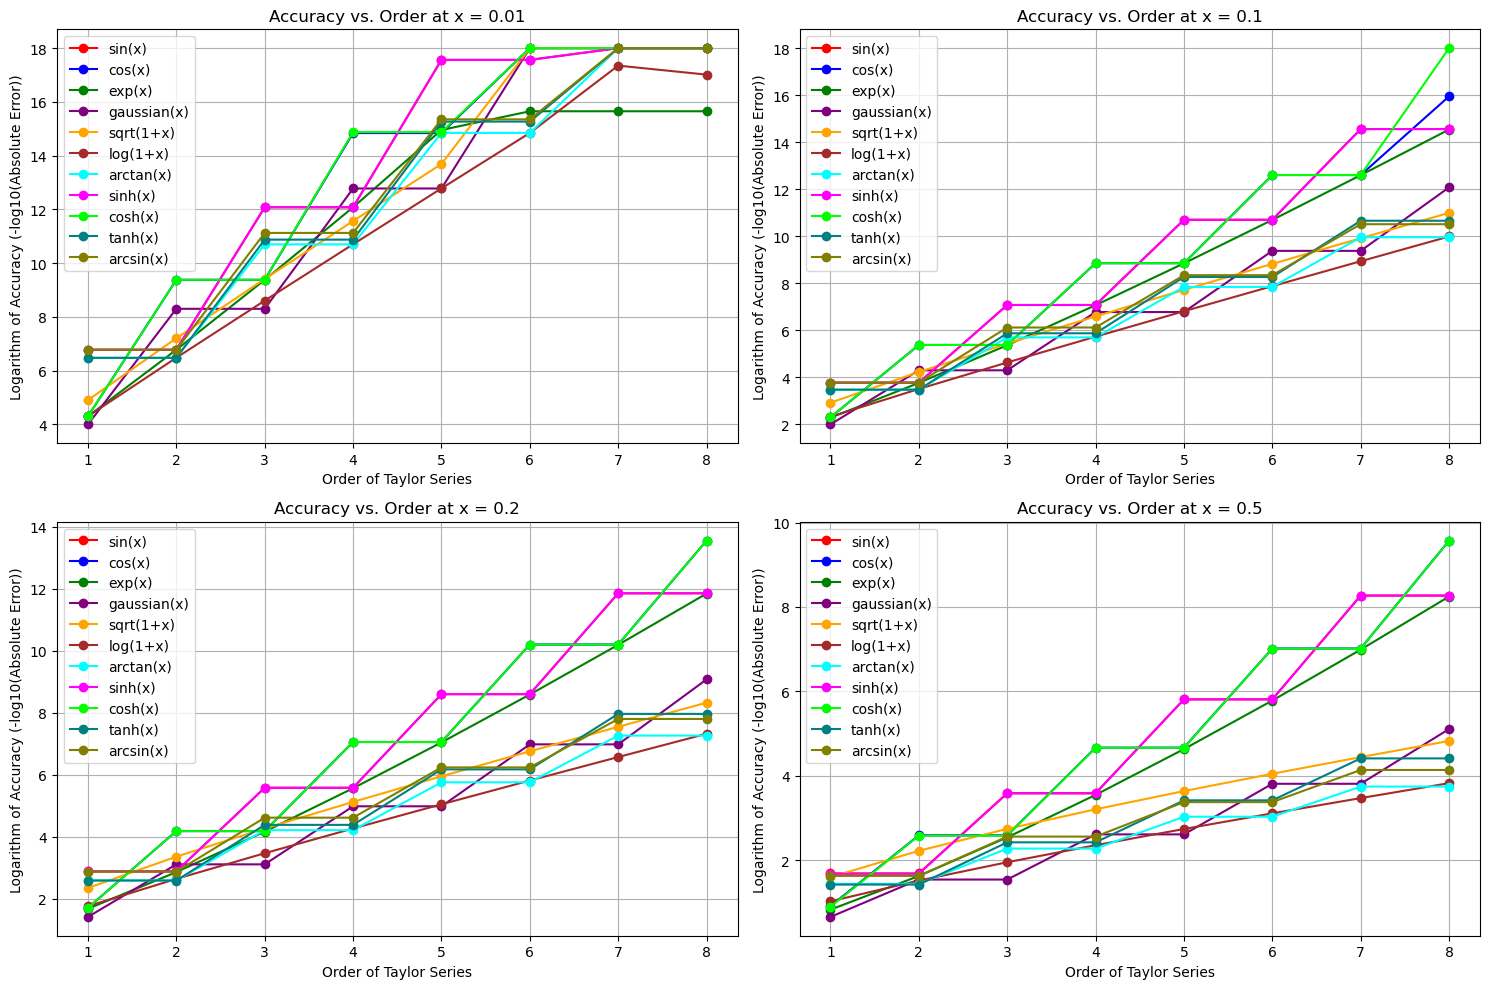

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mtflib import Var, MultivariateTaylorFunction
from mtflib.elementary_functions import sin_taylor, cos_taylor, exp_taylor, gaussian_taylor, sqrt_taylor, log_taylor, arctan_taylor, sinh_taylor, cosh_taylor, tanh_taylor, arcsin_taylor

# Values of x to evaluate
x_values = [0.01, 0.1, 0.2, 0.5]
num_plots = len(x_values)
num_rows = (num_plots + 1) // 2
num_cols = 2

# Maximum order of Taylor series to consider
max_order = MultivariateTaylorFunction.get_max_order()
orders = range(1, max_order + 1)

# Define the variable for Taylor expansion
x = Var(1)

# Functions to evaluate
functions = {
    "sin(x)": (np.sin, sin_taylor, "red"),
    "cos(x)": (np.cos, cos_taylor, "blue"),
    "exp(x)": (np.exp, exp_taylor, "green"),
    "gaussian(x)": (lambda x: np.exp(-x**2), gaussian_taylor, "purple"),
    "sqrt(1+x)": (lambda x: np.sqrt(1 + x), lambda var: sqrt_taylor(1 + var), "orange"),
    "log(1+x)": (lambda x: np.log(1 + x), lambda var: log_taylor(1 + var), "brown"),
    "arctan(x)": (np.arctan, arctan_taylor, "cyan"),
    "sinh(x)": (np.sinh, sinh_taylor, "magenta"),
    "cosh(x)": (np.cosh, cosh_taylor, "lime"),
    "tanh(x)": (np.tanh, tanh_taylor, "teal"),
    "arcsin(x)": (np.arcsin, arcsin_taylor, "olive")
}

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Generate plots for each x value
for i, x_val in enumerate(x_values):
    accuracy_data = {}
    for name, (exact_func, taylor_func, color) in functions.items():
        errors = []
        for order in orders:
            MultivariateTaylorFunction.set_max_order(order)
            taylor_series = taylor_func(x)
            approximation = taylor_series.eval(np.array([x_val, 0, 0]))
            try:
                exact_value = exact_func(x_val)
                absolute_error = np.abs(approximation - exact_value)
                errors.append(-np.log10(absolute_error + 1e-18))
            except ValueError as e:
                # Handle cases where the exact function is not defined for x_val
                errors.append(np.nan)
                print(f"Warning: {e} for {name} at x = {x_val}")

        accuracy_data[name] = errors

    # Plotting the results for the current x_val in the corresponding subplot
    ax = axes[i]
    for name, errors in accuracy_data.items():
        color = functions[name][2]
        ax.plot(orders, errors, marker='o', linestyle='-', color=color, label=name)

    ax.set_xlabel("Order of Taylor Series")
    ax.set_ylabel("Logarithm of Accuracy (-log10(Absolute Error))")
    ax.set_title(f"Accuracy vs. Order at x = {x_val}")
    ax.grid(True)
    ax.legend()

# Remove any unused subplots if the number of x_values is odd
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
MultivariateTaylorFunction.set_max_order(max_order)

## 10. Symbolic Representation with SymPy

The `symprint` method provides a way to convert a `MultivariateTaylorFunction` or `ComplexMultivariateTaylorFunction` into a SymPy expression for pretty printing in environments like Jupyter notebooks.

In [ ]:
# This cell requires sympy to be installed.
# You can install it using: pip install sympy
try:
    import sympy as sp
    from IPython.display import display
    sp.init_printing(use_unicode=True)

    # Re-initialize for this demo
    MultivariateTaylorFunction.initialize_mtf(max_order=5, max_dimension=2)
    x = Var(1)

    # --- Example with MultivariateTaylorFunction ---
    print("--- Example: sin_taylor(x) ---")
    mtf_sin = sin_taylor(x)
    sympy_sin_expr = mtf_sin.symprint()
    print("The following is a SymPy object, which will render beautifully in a notebook.")
    display(sympy_sin_expr)

    # --- Example with ComplexMultivariateTaylorFunction ---
    print("--- Example: exp_taylor(i*x) ---")
    i = 1j
    MultivariateTaylorFunction.initialize_mtf(max_order=5, max_dimension=1)
    x_complex = ComplexMultivariateTaylorFunction.from_variable(var_index=1, dimension=1)
    mtf_complex_exp = exp_taylor(i * x_complex)
    sympy_complex_expr = mtf_complex_exp.symprint(symbols=['x'])
    print("The following is a SymPy object for a complex function.")
    display(sympy_complex_expr)

    # --- Example with custom coefficient formatting ---
    print("--- Example: Custom coefficient formatting ---")
    def custom_formatter(c, p):
        # A simple rational formatter
        if np.iscomplexobj(c):
            return sp.Rational(c.real).limit_denominator(10**p) + sp.I * sp.Rational(c.imag).limit_denominator(10**p)
        else:
            return sp.Rational(c).limit_denominator(10**p)

    sympy_custom_format_expr = mtf_sin.symprint(symbols=['x'], precision=3, coeff_formatter=custom_formatter)
    print("The following is a SymPy object with custom rational formatting.")
    display(sympy_custom_format_expr)

except ImportError:
    print("SymPy is not installed. Please install it to run this demo cell.")